# Astronomical Telescopes and Instruments 2020: Exercise Set 9

# Auke Bruinsma, s1594443.

Welcome to the ninth exercise class for ATI 2020. You have to hand in the completed notebook to Brightspace before the start of the next lecture. Information/things to think about will be in regular font, while exercises will be *italic*.

### Make sure your submitted notebook works when run from scratch! You can do this using the menu above 'Kernel/Restart & Run all'. There should be no errors!

*Upload the finished notebook to Brightspace before the start of the next lecture!*

These are the packages you need for this exercise set. You are welcome to add extra, but this should not be necessary.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import hcipy as hp

### Exercise 1: Atmospheric Dispersion Corrector

Earth's atmosphere refracts light differently for different angles and wavelengths
(atmospheric dispersion). The dispersion can be corrected with an
Atmospheric Dispersion Corrector.

The refraction $R$ is well approximated by
$R=(n(\lambda)-1)\tan\theta$ where $\theta$ is the zenith
angle. The refractive index of air as a function of wavelength
at a pressure of 1 atm and a temperature of 290K is given by
$$(n(\lambda)-1)\cdot 10^6=64.328+\frac{29498.1}{146-\frac{(1\ \mu\text{m})^2}{\lambda^2}}+\frac{255.4}{41-\frac{(1\ \mu\text{m})^2}{\lambda^2}}$$

**Question 1.1**: *Calculate the angular difference of apparent position of a star at 400 nm and at 800 nm for a zenith angle of 60 degrees.* 

**Answer**:

So we need to find the apparent position of the star at $\lambda = 400 \text{ nm}$ and at $\lambda = 800 \text{ nm}$.

Combining the two formulas given above, $R$ can be found using:

$$ R = \tan \theta \cdot \Bigg( 64.328+\frac{29498.1}{146-\frac{(1\ \mu\text{m})^2}{\lambda^2}}+\frac{255.4}{41-\frac{(1\ \mu\text{m})^2}{\lambda^2}} \Bigg) \bigg/ 10^6 $$

This is implemented in the code below.

In [15]:
def compute_ang_dif_app_pos(lam, theta):
    return np.tan(theta) * (64.328 + 29498.1/(146-1/lam**2) + 255.4/(41-1/lam**2)) / 1e6

R1 = compute_ang_dif_app_pos(0.4, np.deg2rad(60))
R2 = compute_ang_dif_app_pos(0.8, np.deg2rad(60))

R = (R1 - R2)*3600
print(f'R: {np.rad2deg(R):.4f} arcsec')

R: 2.7594 arcsec


So the angular difference of apparent position of a star at $\lambda = 400 \text{ nm}$ and at $\lambda = 800 \text{ nm}$ for a zenith angle of 60 degrees equals $ \Delta R = 2.7594 \text{ arcsec} $

**Question 1.2**: *What would be the required wedge angle of a BK7 prism in a telescope
pupil to correct this atmospheric dispersion?*

Hint: The paraxial angular deviation of a beam due to a prism with wedge angle $\alpha$ is given by $\Delta\theta = (n(\lambda)-1)\alpha$.

**Answer**: To correct the atmospheric dispersion means that $\Delta \theta$ has such a value so that it balances the value in 1.1 out. So for $\lambda = 400 \text{ nm}$ and at $\lambda = 800 \text{ nm}$, the refractive index needs to be found, and a the wedge angle $\alpha$ needs to be computed, in such a way that for both wavelengths $\Delta \theta$ equals $-2.7594$ arcsec.

The following code contains the implmentation. The BK7 coefficients and the function 

In [3]:
# BK& coefficients from assignment set 1.
BK7_B = np.array([1.03961212E0, 2.31792344E-1, 1.01046945E0])
BK7_C = np.array([6.00069867E-3, 2.00179144E-2, 1.03560653E2])

# Function that computes the refraction index, from assignment 1.
def compute_refraction_index(B, C, lam):
    # Formula taken from slide 27 of the first lecture.
    part_0 = B[0] / (lam**2 - C[0]) # I have divided the equation into several parts for clarity.
    part_1 = B[1] / (lam**2 - C[1])
    part_2 = B[2] / (lam**2 - C[2])
    return np.sqrt(1 + lam**2 * (part_0 + part_1 + part_2))

# Compute refractive indices for both wavelengths for BK7.
n_BK7_04 = compute_refraction_index(BK7_B, BK7_C, lam=0.4)
n_BK7_08 = compute_refraction_index(BK7_B, BK7_C, lam=0.8)

# Create alpha array so that the optimal value can be found.
alpha_arr = np.linspace(0.7*np.pi, 0.8*np.pi, 10000) # Empirically established lower and upper limit.

def compute_delta_theta(n1, n2, alpha):
    theta_1 = (n1-1)*alpha
    theta_2 = (n2-1)*alpha
    return theta_1 - theta_2

delta_theta_arr = compute_delta_theta(n_BK7_04, n_BK7_08, alpha_arr)
opt_delta_theta_index = np.argmin(np.abs(delta_theta_arr + R))

#print(f'R: {R}')
#print(delta_theta_arr)
#print(opt_delta_theta_index)
#print(delta_theta_arr[opt_delta_theta_index])
#print(alpha_arr[opt_delta_theta_index])

print(f'alpha = {np.rad2deg(alpha_arr[opt_delta_theta_index]):.2f} degrees')

alpha = 126.00 degrees


So, the required wedge angle of a BK7 prism would be $126.00$ degrees, which actually sounds quite large to me, so I am not entirely sure if it's correct.

The single-prism corrector will deviate the beam. 

**Question 1.3**: *Design a two-prism system
made of BK7 and F2 that will correct the atmospheric dispersion without
deviating the beam.*

**Answer**: So if I understand this exercise correct it is analog to 1.2, but now with two prisms. So the following code is similar to the code in 1.2, but now with two prisms. The F2 coefficients are taken from the first exercise.

In [4]:
# F2 coefficients.
F2_B = np.array([1.39757037E0, 1.59201403E-1, 1.2686543E0])
F2_C = np.array([9.95906143E-3, 5.46931752E-2, 1.19248346E2])

# Compute refractive indices for both wavelengths for F2.
n_F2_04 = compute_refraction_index(F2_B, F2_C, lam=0.4)
n_F2_08 = compute_refraction_index(F2_B, F2_C, lam=0.8)

# Create alpha/beta array so that the optimal value can be found.
size = 10000
alpha_arr = np.linspace(0*np.pi, 2*np.pi, size)
beta_arr = np.linspace(0*np.pi, 2*np.pi, size)

def compute_delta_theta(n1, n2, n3, n4, alpha, beta):
    angle_arr = []
    
    for i in alpha:
        theta_1 = (n1-1)*i
        theta_2 = (n2-1)*i
        theta_3 = (n3-1)*beta
        theta_4 = (n4-1)*beta
            
        angle_arr.append((theta_1 - theta_2) + (theta_3 - theta_4))
        
    return angle_arr

delta_theta_arr = compute_delta_theta(n_BK7_04, n_BK7_08, n_F2_04, n_F2_08, alpha_arr, beta_arr)
opt_delta_theta_index = np.argmin(np.abs(delta_theta_arr - R))

#print(f'R: {R}')
#print(np.shape(delta_theta_arr))
#print(delta_theta_arr)
#print(int(opt_delta_theta_index/size))
#print(delta_theta_arr[int(opt_delta_theta_index/size)][opt_delta_theta_index%size])
#print(alpha_arr[int(opt_delta_theta_index/size)])
#print(beta_arr[opt_delta_theta_index%size])

print(f'alpha = {np.rad2deg(alpha_arr[int(opt_delta_theta_index/size)]):.2f} degrees')
print(f'beta = {np.rad2deg(beta_arr[opt_delta_theta_index%size]):.2f} degrees')

alpha = 111.32 degrees
beta = 11.92 degrees


So the designed two-prism system has wedge angles $alpha = 111.32$ degrees and $beta = 11.92$ degrees.

### Exercise 2: Noisy detectors

In previous sets you've plotted a couple of intensity fields for a variety of wavefronts. These were always ideal images however, with no camera or photon noise. That will change in this exercise. In this exercise we will examine the effects of a noisy detector on the resulting images.

As always, we start by defining the parameters we will use for the exercise. We will neglect the quantum efficiency of the detector in this exercise (we assume it to be equal to 1).

In [5]:
# pupil grid parameters
N_pupil = 512 # pixels in the pupil plane
D = 1   # pupil plane aperture diameter in m
oversize = 1.05 # pupil grid oversize

# system/wavefront parameters
F = 12 # F-number between pupil and focal grid
wl = 550e-9 # wavelength in m

# focal grid parameters
num_airy = 16 # number of airy rings in focal grid
q = 4 # number of (detector) pixels per lambda/d
phys_scale = F*wl # physical size of 1 lambda/d

# parameters for tilted wavefronts
tilt1 = [-12,0] 
tilt2 = [ 12,0]
contrast = 1E-4

# noisy detector parameters
# values are based on https://www.flir.com/products/chameleon3-usb3/?model=CM3-U3-13S2M-CS
dark_current = 5 # dark current in e-/s/pixel
read_noise = 10 # read noise in e-/pixel
flat_field = 0.02 # flat field standard deviation
well_depth = 9231 # maximum signal in e-/pixel

An important thing to keep in mind with imagers is your noise budget and maximum achievable signal. Assume the detector has the properties given above, and that all the noise sources are independent. With the second assumption you can add all noise sources in quadrature. The photon noise and dark noise follow a Poisson distribution. Assume that to get the most amount of signal we can while still in the linear range of the camera, we want a total of 8000 photons collected in a single pixel.

**Question 2.1**: *Determine the rms noise for a single pixel for this exposure, for an incident flux of 100 photons/s/pixel and an incident flux of 10 photons/s/pixel. What causes the difference between these two values?*




**Answer**:

Information to use:
- Noise: can be added as $\sqrt{\sum(N_i)^2}$, slide 34, lecture 9.
- We want 8000 photons for a single pixel.
    - F = 100 photons/s/pixel ---> t = 80s
    - F = 10 photons/s/pixel ---> t = 800s
- Photon noise and dark noise follow a Poisson distribution, $ P(m) = \frac{e^{-n}n^m}{m!} \quad S/N = \sqrt{n} $
    - Dark noise = 5 photons/s/pixel
    - Read noise = 10 photons/pixel
    - Photon noise

$$ \text{Read noise is already rms noise, so that is just 10 photons for one pixel} $$

$$ \text{The expectation value for a poission distribution } \mathcal{P}(X=k) \frac{\lambda^k}{k!}e^{-\lambda} \text{ equals } \lambda $$

$$ \text{So, the standard deviation equals } \sqrt{\lambda} $$

$$ \text{Photon noise} \rightarrow \sigma = \sqrt{8000} $$

$$ \text{Dark noise} \rightarrow \sigma = \sqrt{5 \cdot 80} = 20 $$

$$ \text{Total noise} \rightarrow \sqrt{10^2 + 20^2 + \sqrt{8000}^2} \approx 92.195 $$

This was for F = 100 photons/s/pixel. F = 10 photons/s/pixel gives:

$$ \text{Total noise} \rightarrow \sqrt{10^2 + \sqrt{4000}^2 + \sqrt{8000}^2} = 110 $$

**Question 2.2**: *What is the maximum SNR that can be reached in these situations?*

**Answer**: The well depth equals $9231$, and the rms noise per pixel equals $92.195$. This means the following gives the maximum SNR:

$$ \frac{9231 - 92.195}{92.195} = 99.12 $$

For F=100, and for F=10:

$$ \frac{9231 - 110}{110} = 82.91 $$

With these calculations out of the way, we will take a look at how the wavefronts you've been plotting in the past exercise sets would look on a physical camera. You are given two sources generated below here. 

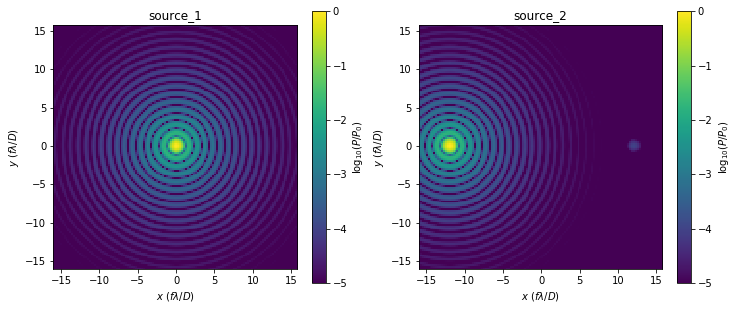

In [6]:
# base objects
pg = hp.make_pupil_grid(N_pupil, oversize*D)
fg = hp.make_focal_grid(q, num_airy, phys_scale)
fraun = hp.FraunhoferPropagator(pg, fg, F*D)

# base wavefront
aperture = hp.circular_aperture(D)(pg)
wf0 = hp.Wavefront(aperture, wl)

# tilted wavefronts (offset in the focal plane)
wf1 = wf0.copy()
wf2 = wf0.copy()
wf1.electric_field *= np.exp(1j*2*np.pi*(pg.points @ tilt1))
wf2.electric_field *= np.exp(1j*2*np.pi*(pg.points @ tilt2))

# focal wavefronts
fwf0 = fraun.forward(wf0)
fwf1 = fraun.forward(wf1)
fwf2 = fraun.forward(wf2)

# generate focal plane images
source_1 = fwf0.power
source_2 = fwf1.power + contrast * fwf2.power

source_1 /= source_1.max()
source_2 /= source_2.max()

# plot images
fig, axs = plt.subplots(1,2, figsize = (12,5))
im = hp.imshow_field(np.log10(source_1), ax = axs[0], vmin = -5, grid_units = F*wl)
plt.colorbar(im, label = "log$_{10}(P/P_0)$", ax = axs[0])
axs[0].set_xlabel("$x$ ($f\lambda/D$)")
axs[0].set_ylabel("$y$ ($f\lambda/D$)")
axs[0].set_title("source_1")

im = hp.imshow_field(np.log10(source_2), ax = axs[1], vmin = -5, grid_units = F*wl)
plt.colorbar(im, label = "log$_{10}(P/P_0)$", ax = axs[1])
axs[1].set_xlabel("$x$ ($f\lambda/D$)")
axs[1].set_ylabel("$y$ ($f\lambda/D$)")
axs[1].set_title("source_2")

plt.show()

Note that in the above code the *Wavefront* attribute '.power' is used rather than the '.intensity' attribute. The power of a *Wavefront* is merely a scaled version of its intensity to correct for the physical area of every 'pixel' in the grid. We can directly scale the above images with a photon flux to get a photon flux image. 

Next we need a model for a detector. *hcipy* has built-in classes for both noisy and noiseless detectors. We will use a slightly modified version of *hcipy*'s *NoisyDetector* class, which allows for non-linear behaviour as a function of input signal.

In [7]:
class NoisyDetector(object):
    '''
    A detector class that has some basic noise properties. Adapted from the
    NoisyDetector class of hcipy.
    
    Parameters
    ----------
    grid : Grid
        The grid on which the detector samples.
    dark_current_rate : scalar or array_like
        An array or scalar that gives dark current rate in counts per unit time for each point
        in the grid.
    read_noise : scalar or array_like
        An array or scalar that gives the rms read noise counts for each point in the grid.
    flat_field : scalar or array_like
        An array or scalar that gives the flat field error for each point in the
        grid. If a scalar is given, a random normal distributed flat field map (given scalar
        is standard deviation about 1) is generated that will be used.
    include_photon_noise : boolean
        Turns the photon noise on or off. Default: True.
    activation_function: function or None
        Activation function for the detector to include non-linear response to signals. If None
        nothing will be applied. Default: None.
    '''
    def __init__(self, grid, dark_current=0, read_noise=0, flat_field=0, include_photon_noise=True, activation_function=None):
        # Setting the start charge level.
        self.accumulated_charge = 0

        # The parameters.
        self.grid = grid
        self.dark_current = dark_current
        self.read_noise = read_noise
        self.flat_field = flat_field
        self.include_photon_noise = include_photon_noise
        self._exposure_time = 0
        self.activation = activation_function

    @property
    def flat_field(self):
        return self._flat_field

    @flat_field.setter
    def flat_field(self, flat_field):
        if np.isscalar(flat_field):
            self._flat_field = np.random.normal(loc=1.0, scale=flat_field, size=self.grid.size)
        else:
            self._flat_field = flat_field

    def integrate(self, wavefront, dt, weight):
        '''
        Integrates the detector.
        The amount of power that the detector generates is calculated
        for a given integration time and weight.
        
        Parameters
        ----------
        wavefront : hcipy.Wavefront or array_like
            The wavefront sets the amount of power generated per unit time.
        dt : scalar
            The integration time in units of time.
        weight : scalar
            Weight of every unit of integration time.
        '''
        # The power that the detector detects during the integration.
        if hasattr(wavefront, 'power'):
            power = wavefront.power
        else:
            power = wavefront

        self.accumulated_charge += power * dt * weight
        self._exposure_time += dt

    def read_out(self):
        '''
        Reads out the detector.
        The read out operation of the detector. This means that, if applicable, first photon noise
        will be included to the power. Then, in this order, the flat field error and
        read-out noise are applied. After the read out the power is reset.
        
        Returns
        ----------
        hcipy.Field
            The final detector image.
        '''
        # Make sure not to overwrite output
        output_field = self.accumulated_charge.copy()
        
        # Adding dark noise.
        output_field += self._exposure_time * self.dark_current

        # Adding photon noise.
        if self.include_photon_noise:
            output_field = hp.large_poisson(output_field, thresh=1e6)

        # Adding flat field errors.
        output_field *= self.flat_field
        
        # Adding read-out noise.
        output_field += np.random.normal(loc=0, scale=self.read_noise, size=output_field.size)
        
        # Applying activation function
        if self.activation is not None:
            output_field = self.activation(output_field)

        # Reset detector
        self.accumulated_charge = 0
        self._exposure_time = 0
        

        return output_field
    def __call__(self, wavefront, dt=1, weight=1):
        '''
        Integrate and read out the detector.
        This is a convenience function to avoid having to call two functions
        in quick succession.
        
        Parameters
        ----------
        wavefront : Wavefront or array_like
            The wavefront sets the amount of power generated per unit time.
        dt : scalar
            The integration time in units of time.
        weight : scalar
            Weight of every unit of integration time.
        
        Returns
        ----------
        Field
            The final detector image.
        '''
        self.integrate(wavefront, dt, weight)
        return self.read_out()

We also need a function giving non-linear pixel behaviour. We will use a generalized sigmoid function for this to get the qualitative behaviour of (approximate) linearity at small numbers of photons, which smoothly goes to a constant signal as the electron well is filled up.

In [8]:
def get_simple_activation_function(max_output=1, max_input=1, n=4):
    '''
    Get a generalized sigmoid curve generator for pixel response.
    
    Parameters
    ----------
    max_output : scalar
        Maximum output signal as the input signal goes to infinity.
    max_input : scalar
        Input signal at which there is a significant deviation from
        linear behaviour.
    n : scalar
        Sigmoid shape parameter.
        
    Returns
    -------
    function
        Function taking a single argument which evaluates the sigmoid
        at the given values.
    '''
    def activation_function(signal):
        A = -max_output
        K = max_output
        Q = 2**n - 1

        res = A + (K-A)/(1+Q*np.exp(-n*signal/max_input))**(1/n)

        return res
    return activation_function

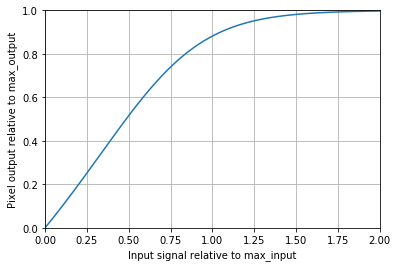

In [9]:
input_signal = np.linspace(0, 2, 1000)
output_signal = get_simple_activation_function()(input_signal)

plt.figure()
plt.plot(input_signal, output_signal)
plt.xlabel("Input signal relative to max_input")
plt.ylabel("Pixel output relative to max_output")
plt.axis(xmin=0, xmax = input_signal.max(), ymin=0, ymax = 1)
plt.grid()

Now we can make an instance of the noisy detector.

In [10]:
activation_function = get_simple_activation_function(1, well_depth)
detector = NoisyDetector(fg, dark_current, read_noise, flat_field, activation_function = activation_function)

Because *source_1* and *source_2* were normalized to their maxima, when we multiply by a photon flux this corresponds to the peak photon flux in the image.

**Question 2.3**: *Integrate the noisy detector with source_1 and plot the resulting image. Use a logarithmic color scale, a peak photon flux of 400 photons/s/pixel, and an exposure time of 20 seconds.*

Note that some pixels in the image will be smaller than zero due to the read noise. This is because we don't include a bias to the detector image. You can set values $<0$ to zero in the detector image. 

In order to use the detector object correctly, take a look at its code above. If you have never seen code with classes in Python before, take a look at https://docs.python.org/3/tutorial/classes.html. **If you can't get it to work, let the TAs know,** as then you will have trouble with the rest of the exercises below here!

In [11]:
# Your code goes here ...

**Question 2.4**: *How many Airy rings can you still see? Can you explain why you see this amount?*

Hint: think back to the maximum SNR values you found previously.

**Your answer goes here ...**

In the lecture we covered frame correction by attempting to remove the effects of the dark noise, flat noise, and bias (which we don't worry about in this exercise). You get to do this now. Recall that to get a dark frame, you need an exposure of darkness (a *Field* of zeroes in *hcipy*), while for the flat you need a uniform exposure (a *Field* with constant values). You can create a new *Field* based on a *numpy* array by giving *hp.Field* both the array and the corresponding grid as arguments.

**Question 2.5**: *Choose exposure times for the dark and flat, create these, and plot them.*

In [12]:
# Your code goes here ...

**Question 2.6**: *Correct your detector image of source_1 and plot it with a logarithmic color scale. What has changed compared to the uncorrected image?*

Hint: If your result looks weird, go back and try some different exposure times for your dark and flat (or change the photon flux for the flat).

In [13]:
# Your code goes here ...

**Question 2.7**: *Make a detector image of source_2, assuming a peak photon flux of $10^5$ photons/s/pixel. Pick the exposure time such that you can see the source on the right. You can choose to plot the uncorrected frame, corrected frame, or both. What has happened to the brighter source and why?*

In [14]:
# Your code goes here ...

This result shows that you have to be careful in picking your exposure time, depending on what feature you want to observe. A different option is of course to get a camera with a bigger dynamic range.

### Make sure your submitted notebook works when run from scratch! You can do this using the menu above 'Kernel/Restart & Run all'. There should be no errors!

*Upload the finished notebook to Brightspace before the start of the next lecture!*